# Upper Confidence Bound (UCB)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
# the csv file is simulating because reinforcement is costly setup web page and record if ads are clicked
# Each row simulates a user and cells represent if they clicked on the ad or not
# Each click is a cost b/ we could being the show the best clicked add
# row == "round"

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [5]:
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


## Implementing UCB

In [6]:
# Upper Confidence Bound Algorithm
# 1. At each round n, we consider two numbers for each avertisement i
#    N_i(n): the number of times the ith advertisement was selected up to round n
#    R_i(n): the number of rewards of the ith advertisement up to round n
# 2. From these two numbers we compute:
#    * the average reward of the ith advertisement up to round n
#        r_bar_i(n) = R_i(n) / N_i(n)
# * the confidence interval [r_bar_i(n) = △_i(n), r_bar_i(n) + △_i(n)] at round n with
#        △_i(n) = sqrt(3/2 * log(n)/N_i(n))

In [24]:
total_rounds = len(dataset)
num_advertisements = len(dataset.columns)
ads_selected = []
N = [0] * num_advertisements # the nmber of times ad i has been selected (shown) up to round n
R = [0] * num_advertisements # the total sum of rewards obtained from ad i up to round n
total_rewards = 0

In [25]:
import math
for n in range(total_rounds):
    ad = 0
    max_upper_bound = 0
    for i in range(num_advertisements):
        # determine if the add has been selected
        # has to be greater than 0 since r_bar_i would throw an exception
        if N[i] > 0:
            r_bar_i = R[i] / N[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / N[i])
            upper_bound = r_bar_i + delta_i
        else:
            # first 10 wont be selected
            upper_bound = float("inf")
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            # select ad i
            ad = i
    ads_selected.append(ad)
    # simulation
    N[ad] += 1
    reward = dataset.values[n, ad]
    R[ad] += reward
    total_rewards += reward
    
    


            
        

In [26]:
N

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]

In [27]:
R

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]

In [28]:
total_rewards

2178

## Visualising the results

Text(0, 0.5, 'Number of times each add was selected')

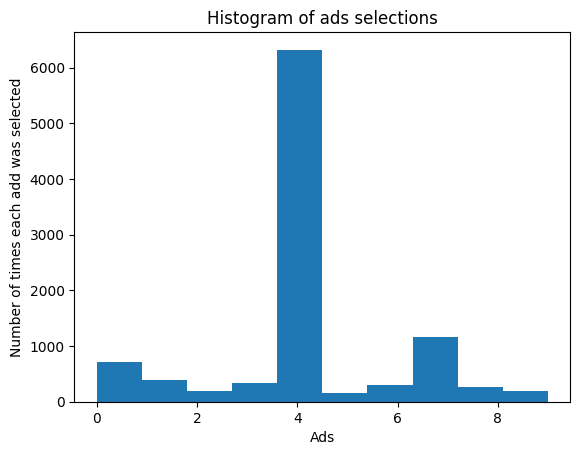

In [29]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each add was selected")